In [23]:
from bunyip import Bunyip
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd
import subprocess

In [50]:
# Load yer lightcurve here
time, flux = np.loadtxt('lcs/lc005.data', usecols=(0,1)).T
# I also know the orbital period is the last data point
period = time[-1]
flux /= np.max(flux)

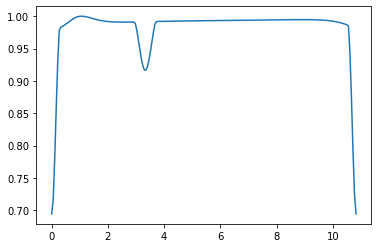

In [51]:
plt.plot(time, flux)

In [52]:
np.savetxt('ebai/dlc1.data', list(zip(time, flux, np.zeros_like(time))))

In [53]:
c = subprocess.getoutput("ebai -r -s 1 -n 201:40:5 --data-dir ebai --unknown-data --i2h i2h.33k.weights \
                        --h2o h2o.33k.weights --param-bounds bounds.33k.data")
ebai_out = c.split('initiating recognition')[-1].split('#')[0].split('\n')[1].split('\t')[::2][:-1]

In [54]:
tratio, rsum, esinw, ecosw, sini = [float(ebai) for ebai in ebai_out]
ecc, per0 = np.sqrt(esinw**2 + ecosw**2), np.arctan2(esinw,ecosw)
fc, fs = ecc*np.cos(per0), ecc*np.sin(per0)

In [57]:
bn = Bunyip.from_lightcurve(time, flux, period=time[-1])

In [58]:
bn.parameters.update({
    'sbratio': tratio,
    'rsum': rsum,
#     'fc': fc,
#     'fs': fs
})

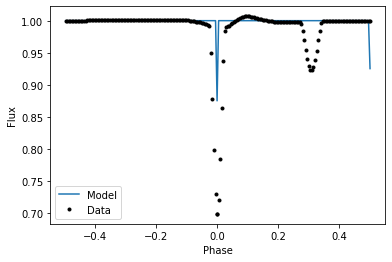

In [59]:
bn.plot_model()